## Investigating Fandango Movie Ratings

This project is to find out about changed in Fandango's rating after Hickey' analysis

The goal is to find the actutal rating ?

In [2]:
import pandas as pd

In [3]:
pre = pd.read_csv("fandango_score_comparison.csv")
af = pd.read_csv("movie_ratings_16_17.csv")

pre.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [5]:
af.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [6]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Isolate the columns that offer information about fandango's ratings

In [7]:
fan_pre = pre[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fan_af = af[['movie', 'year', 'fandango']].copy()

fan_pre.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
fan_af.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


The samplling processes in both data set is not random. So the resulting samples are very unlikely to be rapresentative of the population we're interested. This might cause a large sampling error.

## Change the Goal 
- The population of interest changes and the samples will become representative.
- Our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.


In [9]:
fan_af.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5



Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

|Movie	| Fan ratings |
|--------|------------|
|Mechanic: Resurrection	| 2247 |
|Warcraft	| 7271 |
|Max Steel	| 493 |
|Me Before You	| 5263 |
|Fantastic Beasts and Where to Find Them	| 13400 |
|Cell	| 17 |
|Genius	 | 127 |
|Sully	| 11877 |
|A Hologram for the King	| 500 |
|Captain America: Civil War	| 35057 |

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's also double-check the other data set for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.

In [10]:
fan_pre.sample(10, random_state=5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
124,Home (2015),4.5,4.4,7705,0.1
117,Testament of Youth (2015),4.0,3.9,127,0.1
81,Big Eyes (2014),4.0,3.8,1501,0.2
42,About Elly (2015),4.0,3.6,43,0.4
111,Into the Woods (2014),3.5,3.4,13055,0.1
56,Project Almanac (2015),4.0,3.7,1834,0.3
1,Cinderella (2015),5.0,4.5,12640,0.5
69,Mr. Turner (2014),3.5,3.2,290,0.3
25,Selma (2014),5.0,4.6,7025,0.4
82,Blackhat (2015),3.0,2.8,1430,0.2


In [11]:
fan_pre["year"] = fan_pre["FILM"].str[-5:-1]
fan_pre["FILM"] = fan_pre["FILM"].str[:-6]
fan_pre

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron,5.0,4.5,14846,0.5,2015
1,Cinderella,5.0,4.5,12640,0.5,2015
2,Ant-Man,5.0,4.5,12055,0.5,2015
3,Do You Believe?,5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2,3.5,3.0,1021,0.5,2015
5,The Water Diviner,4.5,4.0,397,0.5,2015
6,Irrational Man,4.0,3.5,252,0.5,2015
7,Top Five,4.0,3.5,3223,0.5,2014
8,Shaun the Sheep Movie,4.5,4.0,896,0.5,2015
9,Love & Mercy,4.5,4.0,864,0.5,2015


In [12]:
fan_pre["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [13]:
fan_2015 = fan_pre[fan_pre["year"] == "2015"].copy()
fan_2015["year"].value_counts()

2015    129
Name: year, dtype: int64

In [14]:
fan_af["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
fan_2016 = fan_af[fan_af["year"] == 2016].copy()
fan_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shape for 2015 and 2016
Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots. We'll use the FiveThirtyEight style for the plots.

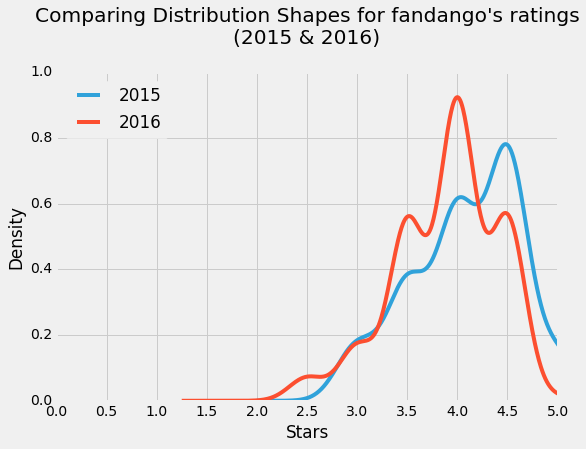

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

fan_2015["Fandango_Stars"].plot.kde(label="2015", legend=True, figsize=(8,5.5))
fan_2016["fandango"].plot.kde(label="2016", legend=True)

plt.title("Comparing Distribution Shapes for fandango's ratings\n(2015 & 2016)", y=1.07)
plt.xlabel("Stars")
plt.xlim(0,5)
plt.xticks(np.arange(0,5.1,0.5))
plt.show()

The graph show:
- Both distribute are strongly left skewed
- The 2016 distribution is slightly shifted to the left relative to the 2015 distribution

The slight left shift of 2016 is very interesting. This mean the movies in 2016 is less popular than 2015.

## Comparing Relative Frequency

In [22]:
print("2015" + "\n" + "-"*16)

fan_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [25]:
print("2016" + "\n" + "-"*16)

fan_2016["fandango"].value_counts(normalize=True).sort_index()*100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high rating (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016 the 5 stars rating had only under 1%, compared to 2015 which got close to 7%. Not only about 5 stars rating but also 4.5 stars rating too. In 2015 had 13% more 4.5 stars rating compared to 2016.

The minimum rating is also lower in 2016 2.5 stars instead of 3 stars, minimum of 2015.

In [34]:
mean_2015 = fan_2015["Fandango_Stars"].mean()
mean_2016 = fan_2016["fandango"].mean()

median_2015 = fan_2015["Fandango_Stars"].median()
median_2016 = fan_2016["fandango"].median()

mode_2015 = fan_2015["Fandango_Stars"].mode()[0]
mode_2016 = fan_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean", "median", "mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


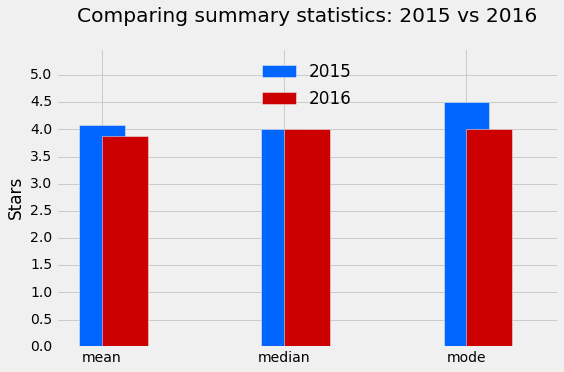

In [42]:
plt.style.use('fivethirtyeight')
summary["2015"].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary["2016"].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [43]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Popular movies release in 2016 were rated lower than in 2015.